<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Notas/blob/main/Machine%20Learning/Aprendizaje%20Supervisado/Modelos_Supervisados_Panorama_General.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de ploblemas supervisados

El objetivo de este notebook es presentar una visión general de los principales modelos de aprendizaje supervisado antes de entrar al estudio detallado de cada uno, ademas, estos modelos serán los usados en los siguientes notebooks, en este se muestran las ideas conceptuales, no busca optimizar modelos.

In [2]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
np.set_printoptions(precision=2)


## Regresión

**Regresión básica**

El primer ejemplo es un problema de regresión simple con, una sola variable de entrada informativa, una salida lineal con ruido y 100 muestras.

Cada punto del diagrama de dispersión representa una observación, en el eje $x$ es el valor de la característica futuro y en el eje $y$ va el valor objetivo de regresión.

Este tipo de ejemplo ayuda a entender cómo un modelo de regresión aprende una relación lineal en presencia de ruido.

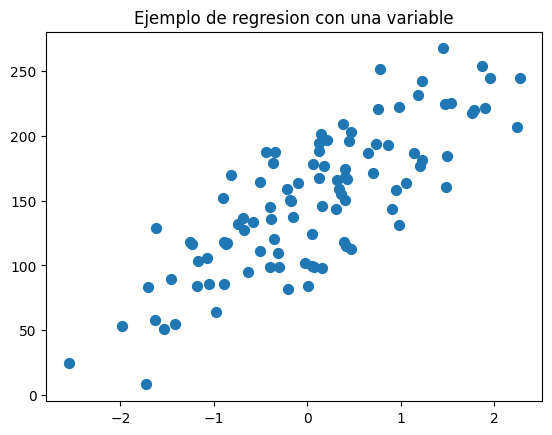

In [4]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Ejemplo de regresion con una variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

**Regresión con datos del mundo real**

Finalmente, se presenta un problema de regresión real usando un dataset basado en datos de comunidades y crimen:

Cada observación representa una región geográfica, se utilizan muchas características (alta dimensión), el objetivo es predecir la tasa per cápita de crimen violento, este ejemplo muestra las diferencias clave entre:

Datasets sintéticos (simples, interpretables)

Datasets reales (alta dimensión, más complejos y menos intuitivos)

In [8]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('/content/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']
    print(crime)
    return (X_crime, y_crime)

In [9]:
(X_crime, y_crime) = load_crime_dataset()

      population  householdsize  agePct12t21  agePct12t29  agePct16t24  \
0          11980           3.10        12.47        21.44        10.93   
1          23123           2.82        11.01        21.30        10.48   
2          29344           2.43        11.36        25.88        11.01   
3          16656           2.40        12.55        25.20        12.19   
5         140494           2.45        18.09        32.89        20.04   
...          ...            ...          ...          ...          ...   
2210       56216           3.07        15.46        30.16        14.34   
2211       12251           2.68        17.36        31.23        16.97   
2212       32824           2.46        11.81        20.96         9.53   
2213       13547           2.89        17.16        30.01        14.73   
2214       28898           2.61        12.99        25.21        11.63   

      agePct65up  numbUrban  pctUrban  medIncome  pctWWage  ...  \
0          11.33      11980    100.00      7

**Modelos típicos:**

Linear Regression

Ridge

Lasso

Polynomial Regression

## Clasificación


**Clasificación binaria simple**

Para ilustrar clasificación binaria, se usa un conjunto de datos con dos características informativas, dos clases posibles, usa la primera característica en el eje $x$ y la segunda característica en el eje $y$, el color indica la clase. En este caso, las clases son aproximadamente separables de forma lineal, lo que permite que un clasificador lineal básico funcione bien.

Se añade algo de ruido en las etiquetas para hacer el problema ligeramente más realista y desafiante.

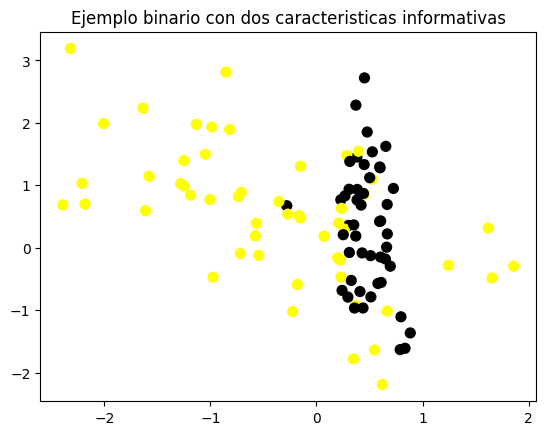

In [5]:
plt.figure()
plt.title('Ejemplo binario con dos caracteristicas informativas')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

**Clasificación binaria no lineal**

También se estudia un problema de clasificación binaria más complejo, donde, las clases no son linealmente separables, los datos forman múltiples clústeres en el espacio de características, este tipo de dataset muestra situaciones donde, un modelo lineal ya no es suficiente y se requieren modelos más flexibles para capturar la estructura de los datos

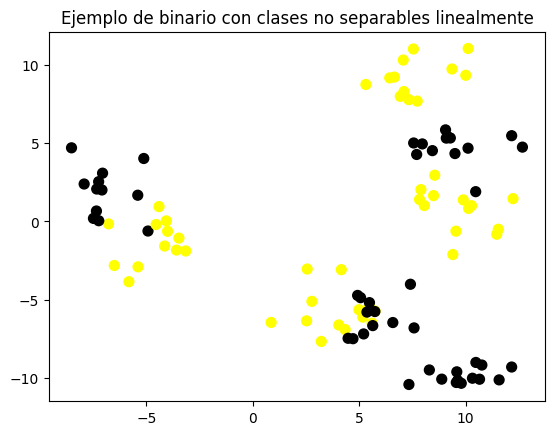

In [6]:
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Ejemplo de binario con clases no separables linealmente')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


**Modelos típicos:**

KNN

Logistic Regression

SVM

Decision Trees

## Clasificación de modelos supervisados

**Modelos paramétricos**

Asumen una forma funcional específica:

$$ y = f(x,ϴ) $$

Como ejemplos tenemos la regresión lineal y regresión logística, entre sus ventajas es que es facil de interpretar y eficientes, sin embargo son menos flexibles

<br>

**Modelos no paramétricos**

No asumen una forma funcional fija, algunos ejemplos son KNN (k nearest neightbors), Árboles de decisión, estos modelos son muy flexibles, capturan relaciones complejas, pero corre riesgo de sobreajuste y son costosos computacionalmente

<br>

**Modelos basados en distancia**

Estos modelos toman decisiones basándose en proximidad geométrica, como el KNN o el Support Vector Machines (SVM), estos modelos son sensibles a la escala, requieren métricas de distancia.

<br>

**Modelos lineales**

Asumen relaciones lineales (o linealizables):

$$ y = w_0 + w_1 x_1+ ... + w_px_p$$

como el Linear Regression, Logistic Regression y Linear SVM, son faciles de interpretar sus coeficientes

<br>

**Modelos basados en reglas**

Utilizan divisiones secuenciales del espacio como el Decision Trees, son muy interpretables, capturan interacciones no lineales y son sensibles a sobreajuste

### Flujo típico de trabajo en ML supervisado

- Definición del problema

- Exploración de datos

- Selección del modelo

- Entrenamiento

- Evaluación

- Ajuste de hiperparámetros